In [4]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle, glob
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
channel_list = ["Tracks_pt", "Tracks_dZSig", "Tracks_d0Sig", "ECAL_energy",
"HBHE_energy", "Pix_1", "Pix_2", "Pix_3", "Pix_4", "Tib_1", "Tib_2",
"Tib_3", "Tib_4", "Tob_1", "Tob_2", "Tob_3", "Tob_4", "Tob_5",
"Tob_6", "Tid_1", "Tec_1", "Tec_2", "Tec_3"]

from scipy.stats import norm
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

m0_scale    = 14
m0_min      = 1.2
m0_max      = 18
mtrue_bins = np.arange(m0_min, m0_max, .4)
mae_min  =0
mae_max  = 10.5
mae_bins = np.arange(mae_min, mae_max, .5)
mre_bins = np.arange(0, 1.05, .05)
mass_bins = np.arange(3600,14000,400)/1000.

out_dir='plots'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
save = True

In [2]:
! ls -lhtr ~/../../bighome/bbbam/

total 1.7M
drwxr-xr-x 2 bbbam users 4.0K Oct  6  2023 IMG_aToTauTau_Hadronic_tauDR0p4_m1p2To17p2_dataset_2_unbaised_v2_valid
drwxr-xr-x 2 bbbam users 8.0K Oct  6  2023 IMG_aToTauTau_Hadronic_tauDR0p4_m1p2To17p2_dataset_2_unbaised_v2_train
drwxr-xr-x 2 bbbam users 4.0K Oct 21  2023 IMG_Upsilon_ToTauTau_Hadronic_tauDR0p4_m3p6To14_dataset_validation_v2
drwxr-xr-x 2 bbbam users 4.0K Oct 21  2023 signal
drwxr-xr-x 4 bbbam users 4.0K Nov 11  2023 classification
drwxr-xr-x 4 bbbam users 4.0K Nov 26  2023 5_channel_boosted_tau_classifier_ResNet_3
drwxr-xr-x 4 bbbam users 4.0K Nov 30  2023 tau_classifier
drwxr-xr-x 4 bbbam users 4.0K Nov 30  2023 13_channel_tau_classifier_ResNet_3
drwxr-xr-x 2 bbbam users 4.0K Dec  3  2023 13_channel_boosted_tau_classifier_Eff0
drwxr-xr-x 4 bbbam users 4.0K Dec  4  2023 4_channels_massregressor_ResNet_3
drwxr-xr-x 4 bbbam users 4.0K Dec  4  2023 13_channel_boosted_tau_classifier_Eff4
drwxr-xr-x 4 bbbam users 4.0K Dec  5  2023 4_channel_boosted_tau_classifier_Ef

In [3]:
ls /bighome/bbbam/ResNet_without_ieta_iphi_run_3/13_ch_massregressor_ResNet/INFERENCE_DATA/

epoch100__mae2.4506_inference_data.pkl  epoch4__mae2.4788_inference_data.pkl
epoch10__mae2.4253_inference_data.pkl   epoch50__mae2.4197_inference_data.pkl
epoch10__mae2.4654_inference_data.pkl   epoch50__mae2.4217_inference_data.pkl
epoch11__mae2.3970_inference_data.pkl   epoch51__mae2.3968_inference_data.pkl
epoch11__mae2.4581_inference_data.pkl   epoch51__mae2.4011_inference_data.pkl
epoch12__mae2.4014_inference_data.pkl   epoch52__mae2.3566_inference_data.pkl
epoch12__mae2.4308_inference_data.pkl   epoch52__mae2.4058_inference_data.pkl
epoch13__mae2.3944_inference_data.pkl   epoch53__mae2.3861_inference_data.pkl
epoch13__mae2.4326_inference_data.pkl   epoch53__mae2.3884_inference_data.pkl
epoch14__mae2.3871_inference_data.pkl   epoch54__mae2.3961_inference_data.pkl
epoch14__mae2.4227_inference_data.pkl   epoch54__mae2.4077_inference_data.pkl
epoch15__mae2.4048_inference_data.pkl   epoch55__mae2.3759_inference_data.pkl
epoch15__mae2.4219_inference_data.pkl   epoch55__mae2.4307_infere

# ---------------signal------------------

In [4]:
local='/bighome/bbbam/ResNet_reg/13_ch_massregressor_ResNet/INFERENCE_DATA_test/INFERENCE_DATA_test'
rhFileList = '%s/*.pkl'%(local)
paths = np.sort(glob.glob(rhFileList))
assert len(paths) > 0
print(f"{len(paths)} files found")

5 files found


In [16]:
epoch=5

data_file = paths[epoch-1]
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
mae_ = data["mae"]
mre_ = data["mre"]

loaded data file ------>  /bighome/bbbam/ResNet_BN_with_ieta_iphi/13_ch_massregressor_ResNet_BN/INFERENCE_DATA/epoch5__mae2.0165_inference_data.pkl


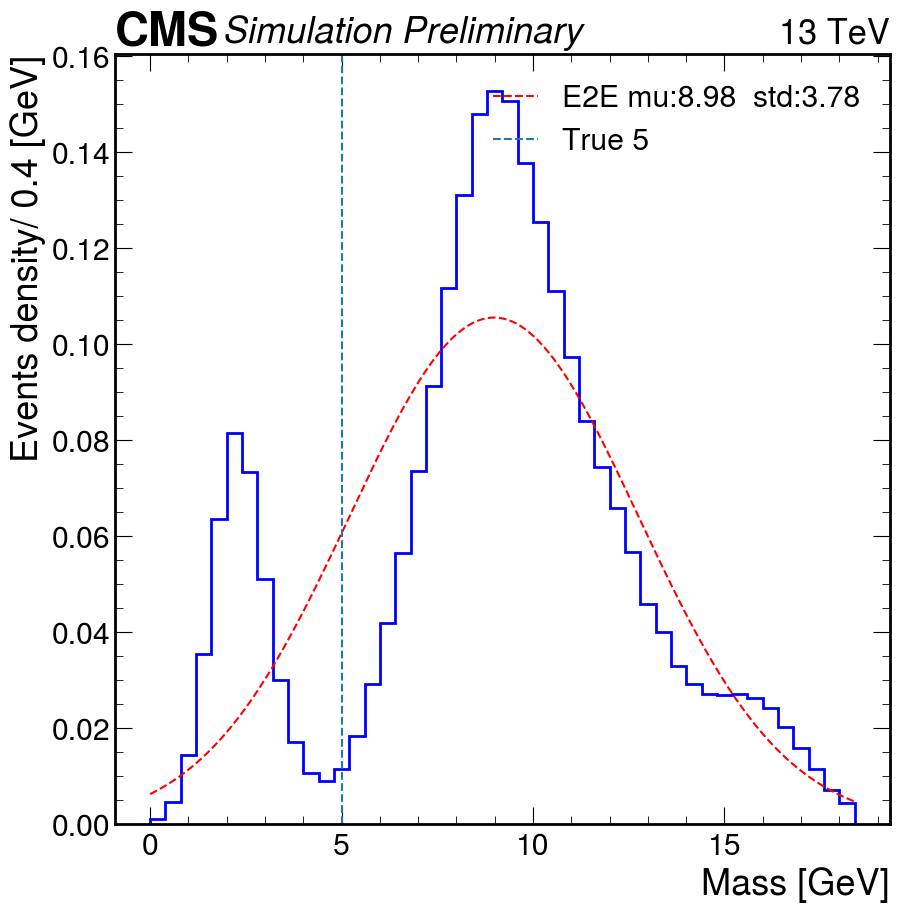

In [17]:
mass = 5
m0 = 1.2
m0_max = 17.2
bin_size=0.4
mu, std = norm.fit(m_pred_)
x = np.linspace(0,m0_max+1.2, num=1000)
y = norm.pdf(x, mu, std)

fig, ax = plt.subplots()
plt.hist(np.array(m_pred_).flatten(),density=True, range=(0,m0_max+1.2), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='-', color='b', linewidth=2)
plt.plot(x, y,linestyle='--', color='red',label=f'E2E mu:{mu:.2f}  std:{std:.2f}')
plt.axvline(x= mass,linestyle='--',label=f'True {mass}')
plt.xlabel('Mass [GeV]')
plt.ylabel('Events density/ 0.4 [GeV]')
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# ------ seperate train and test file-------------

In [14]:
local='/bighome/bbbam/ResNet_without_ieta_iphi_run_3/13_ch_massregressor_ResNet/INFERENCE_DATA'
rhFileList = '%s/*inference_data.pkl'%(local)
paths = np.sort(glob.glob(rhFileList))
assert len(paths) > 0
print(f"{paths} files found")

['/bighome/bbbam/ResNet_without_ieta_iphi_run_3/13_ch_massregressor_ResNet/INFERENCE_DATA/epoch100__mae2.4506_inference_data.pkl'
 '/bighome/bbbam/ResNet_without_ieta_iphi_run_3/13_ch_massregressor_ResNet/INFERENCE_DATA/epoch10__mae2.4253_inference_data.pkl'
 '/bighome/bbbam/ResNet_without_ieta_iphi_run_3/13_ch_massregressor_ResNet/INFERENCE_DATA/epoch10__mae2.4654_inference_data.pkl'
 '/bighome/bbbam/ResNet_without_ieta_iphi_run_3/13_ch_massregressor_ResNet/INFERENCE_DATA/epoch11__mae2.3970_inference_data.pkl'
 '/bighome/bbbam/ResNet_without_ieta_iphi_run_3/13_ch_massregressor_ResNet/INFERENCE_DATA/epoch11__mae2.4581_inference_data.pkl'
 '/bighome/bbbam/ResNet_without_ieta_iphi_run_3/13_ch_massregressor_ResNet/INFERENCE_DATA/epoch12__mae2.4014_inference_data.pkl'
 '/bighome/bbbam/ResNet_without_ieta_iphi_run_3/13_ch_massregressor_ResNet/INFERENCE_DATA/epoch12__mae2.4308_inference_data.pkl'
 '/bighome/bbbam/ResNet_without_ieta_iphi_run_3/13_ch_massregressor_ResNet/INFERENCE_DATA/epoch1

loaded data file ------>  /bighome/bbbam/ResNet_without_ieta_iphi_run_3/13_ch_massregressor_ResNet/INFERENCE_DATA/epoch100__mae2.4506_inference_data.pkl


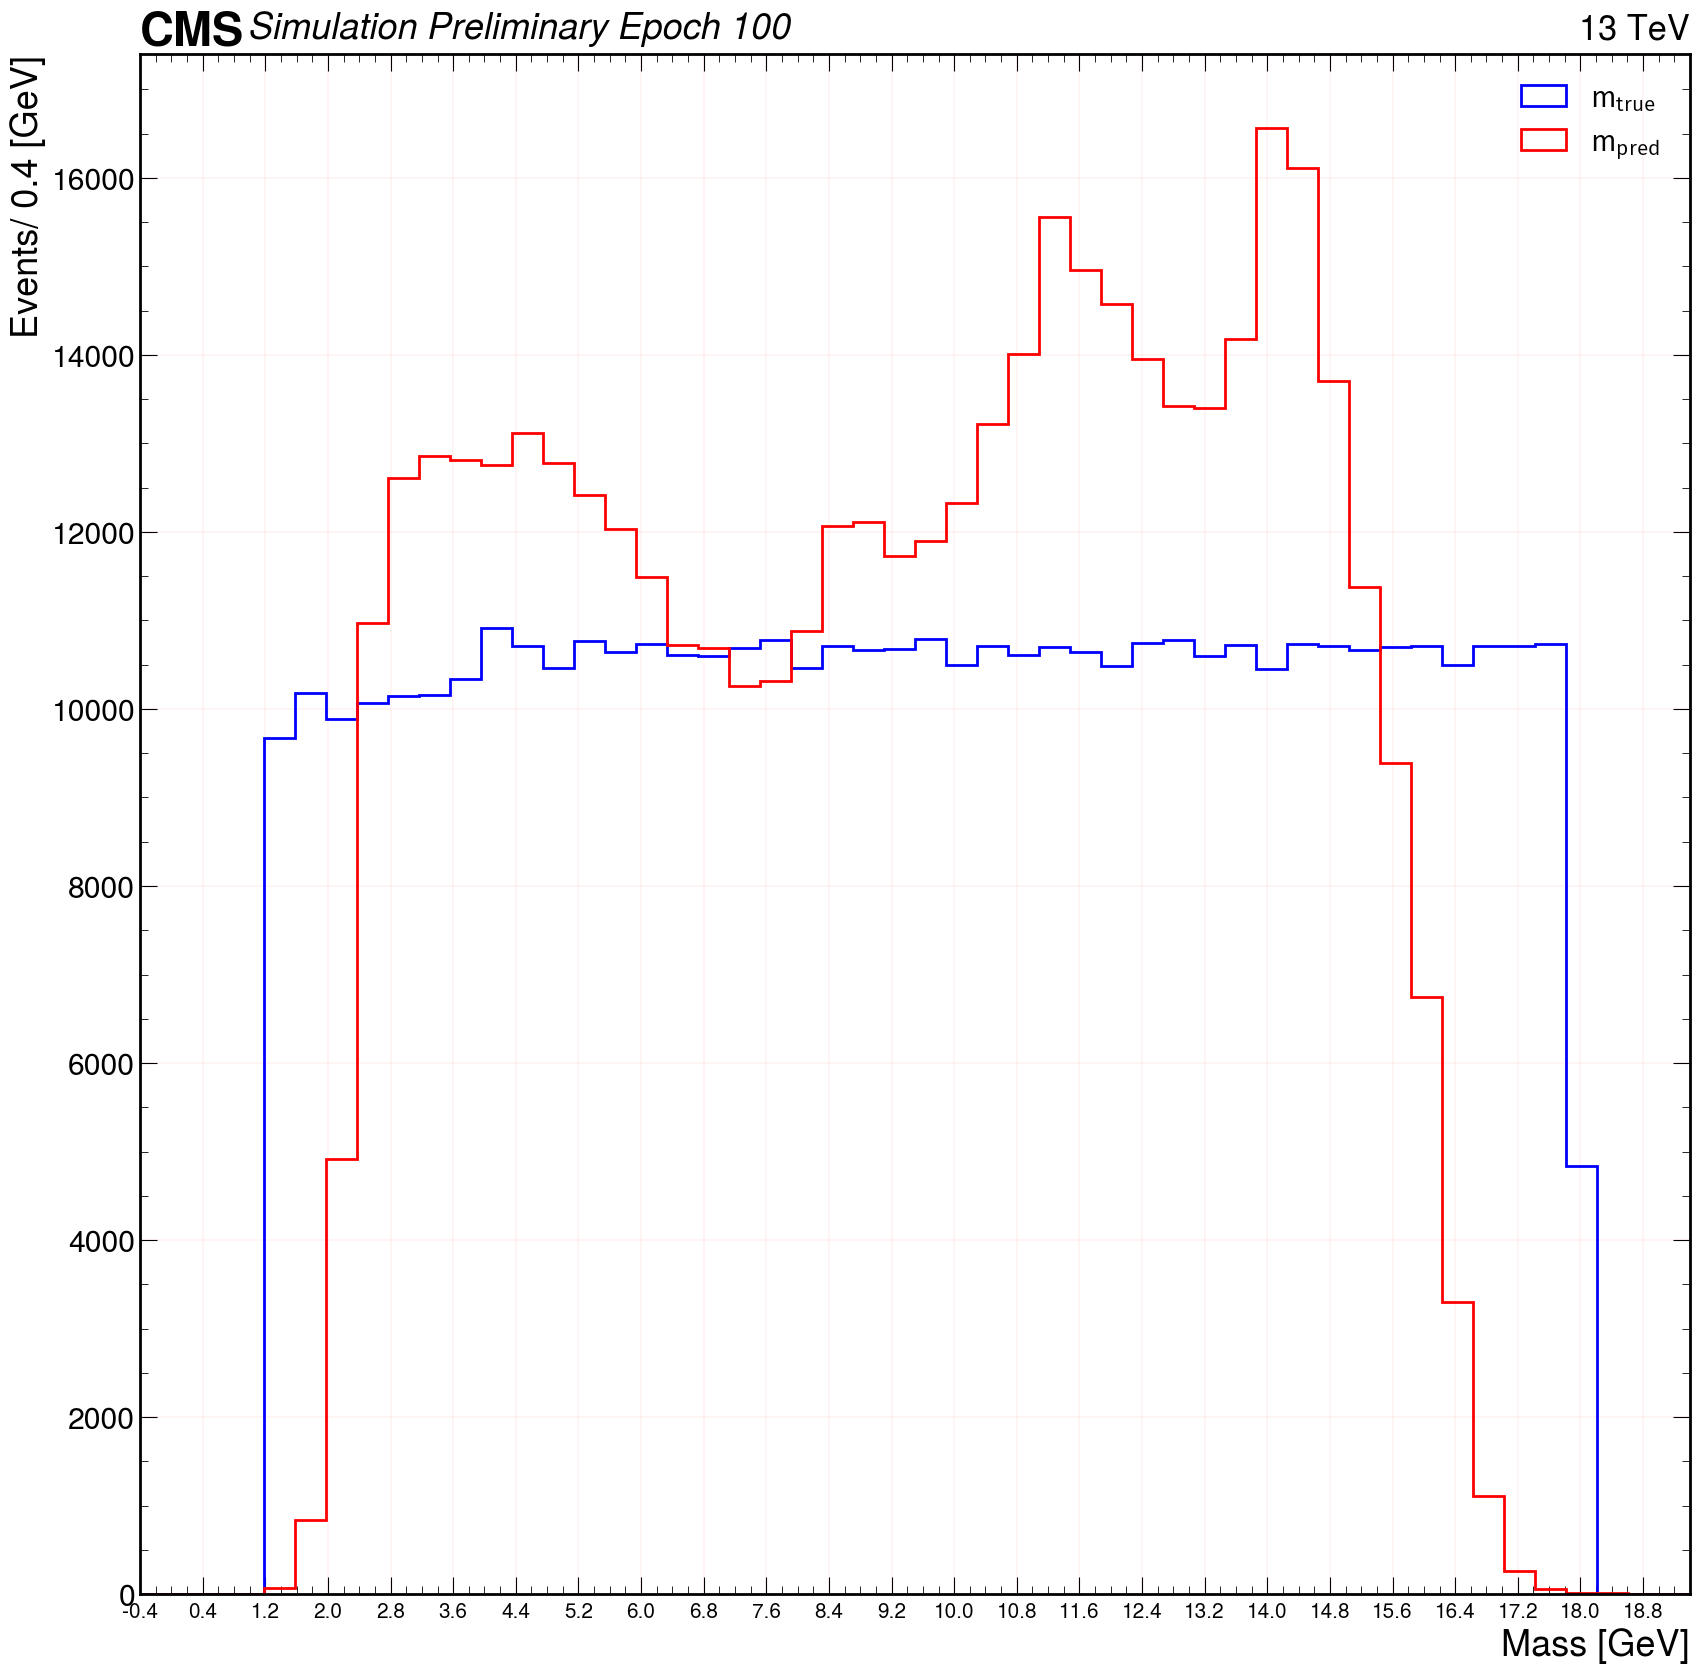

In [12]:
m0_min = 0.8
m0_max = 18.2
bin_size = 0.4
# for epoch in range(len(paths)):
for epoch in range(99,100):
    data_file = glob.glob(f'{local}/epoch{epoch+1}_*.pkl')[0]
    infile = open(f"{data_file}", "rb")
    data = pickle.load(infile)
    print(f"loaded data file ------>  {data_file}")
    infile.close()

    m_true_ = data["m_true"]
    m_pred_ = data["m_pred"]
    mae_ = data["mae"]
    mre_ = data["mre"]

    
    fig, ax = plt.subplots(figsize=(20,20))
    plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
    plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
    plt.xlim(m0_min-1.2,m0_max+1.2)
    plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),size=15)
    plt.grid(color='r', linestyle='--', linewidth=.1)
    plt.xlabel('Mass [GeV]')
    plt.ylabel('Events/ 0.4 [GeV]')
    # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
    plt.legend(loc='upper right')
    hep.cms.label(llabel=f"Simulation Preliminary Epoch {epoch+1}", rlabel="13 TeV", loc=0, ax=ax)
    # plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
    plt.show()

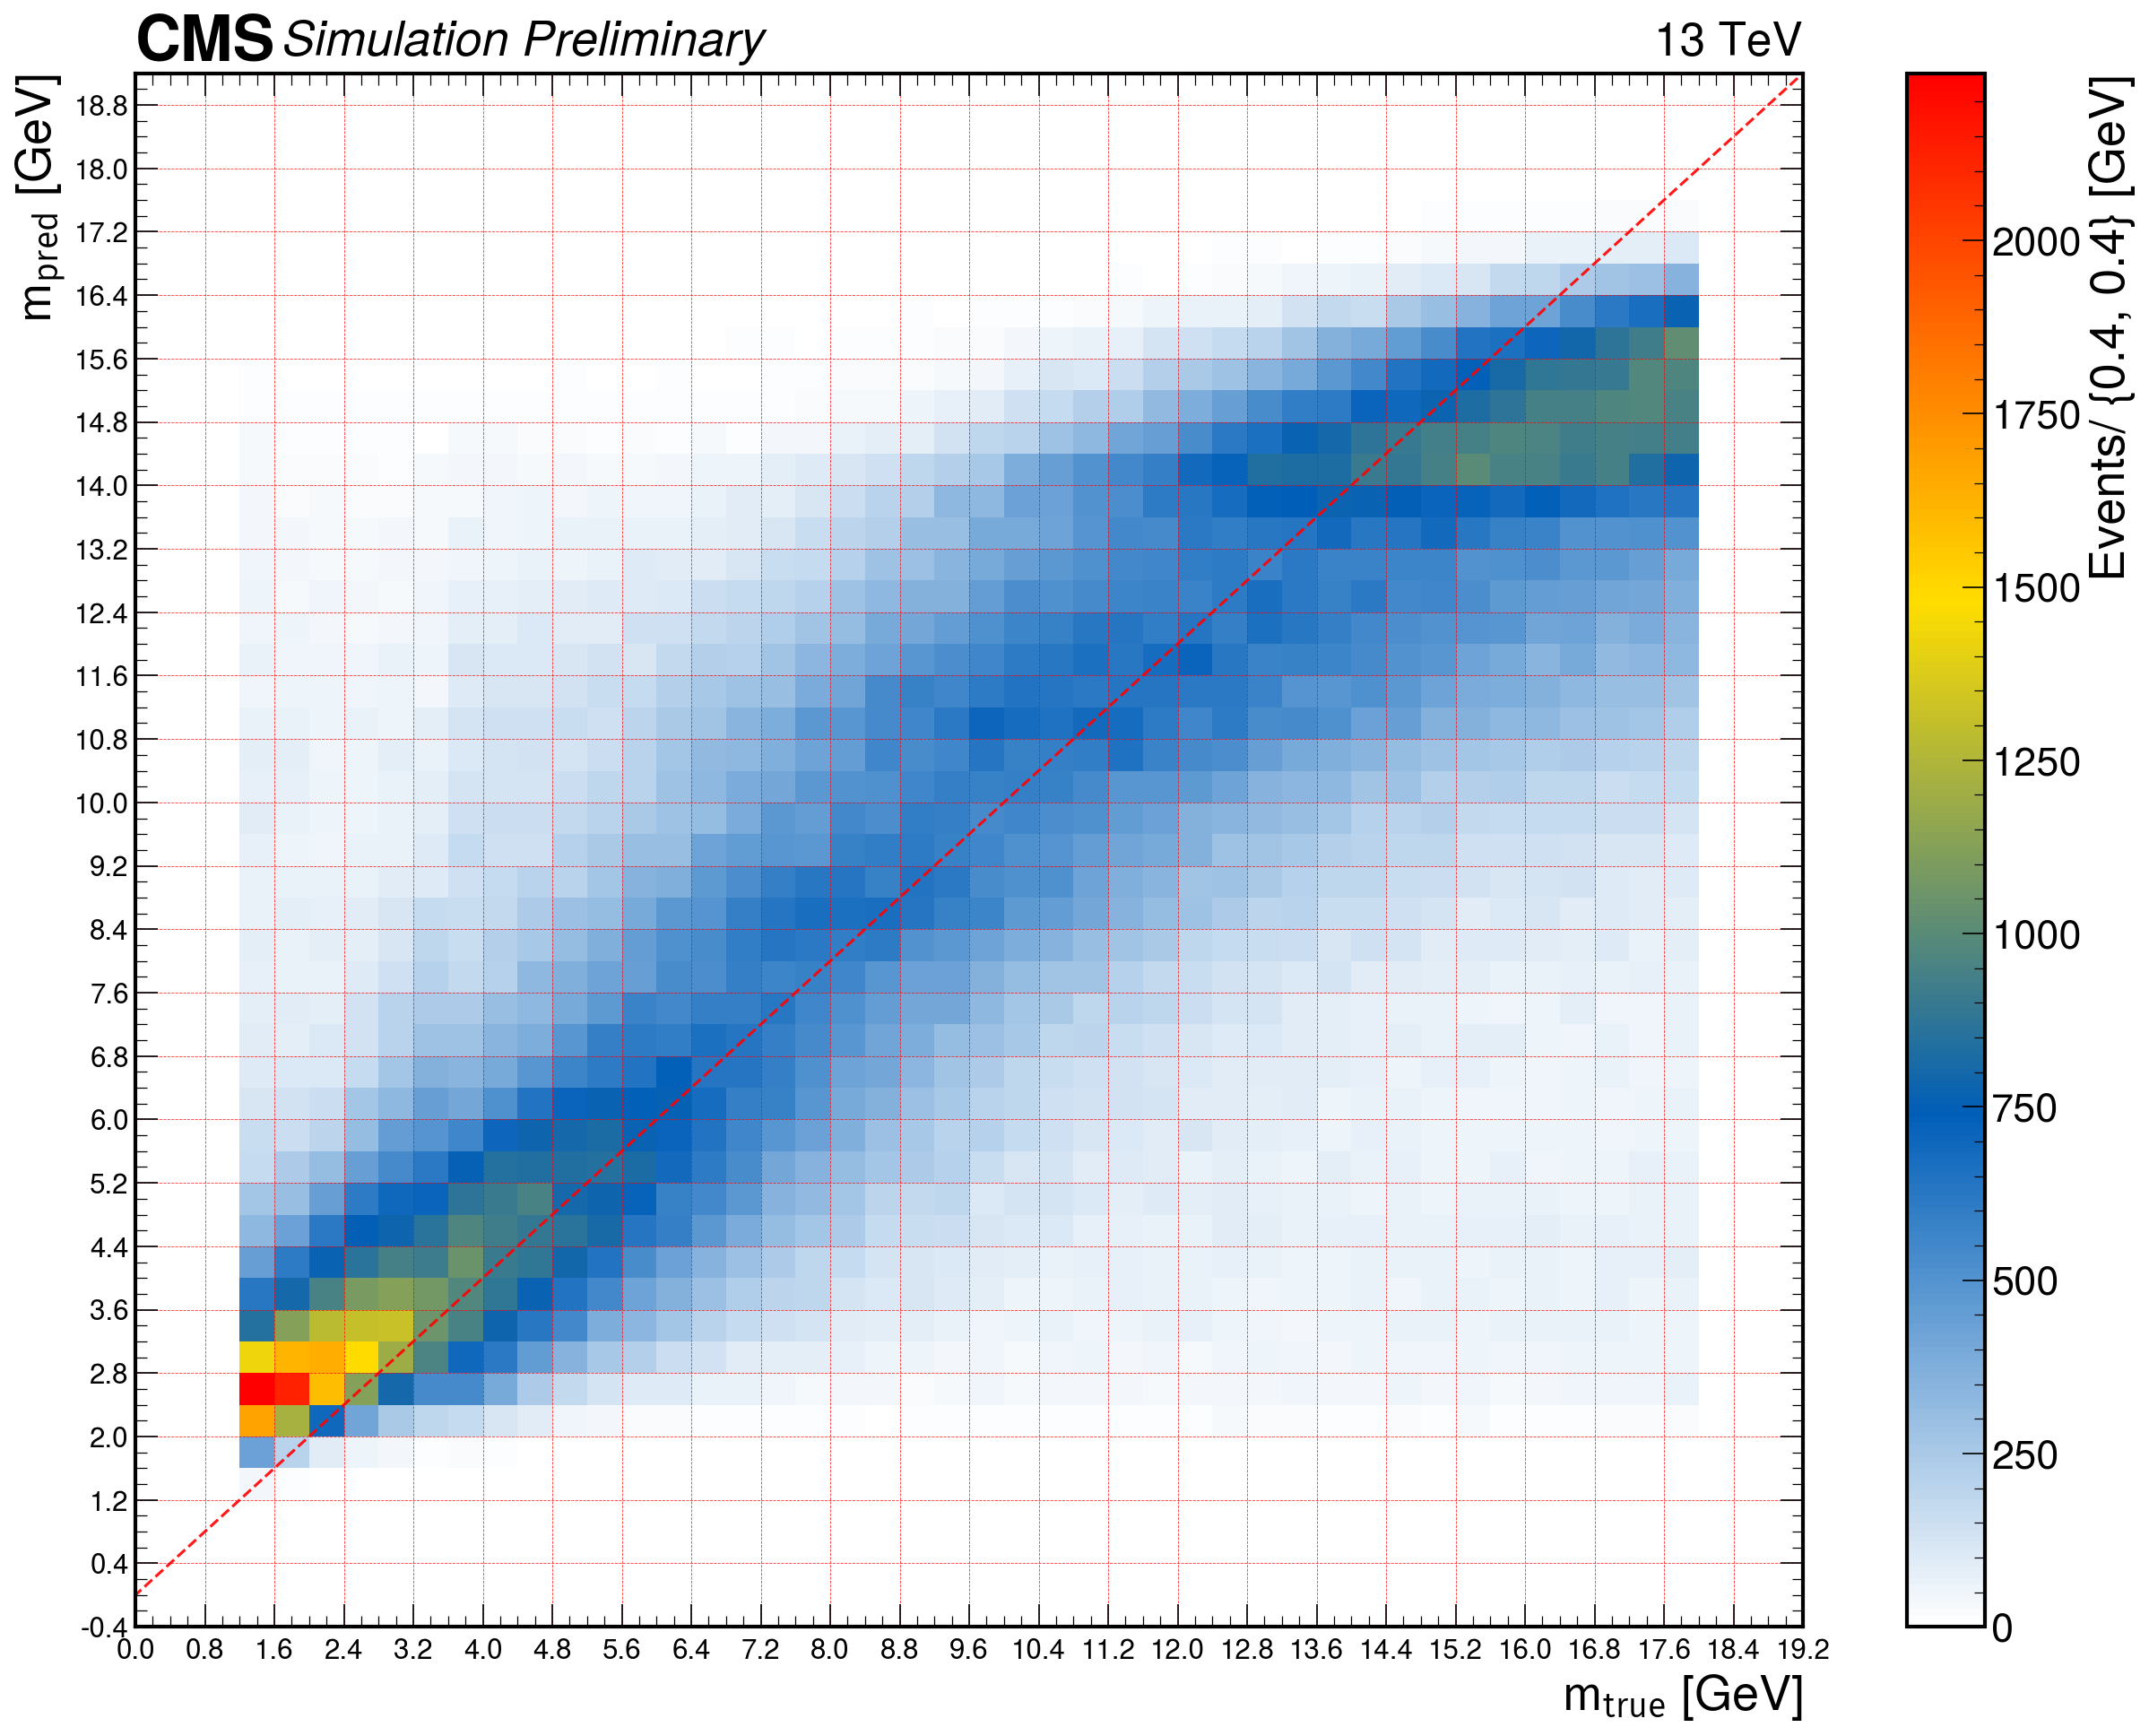

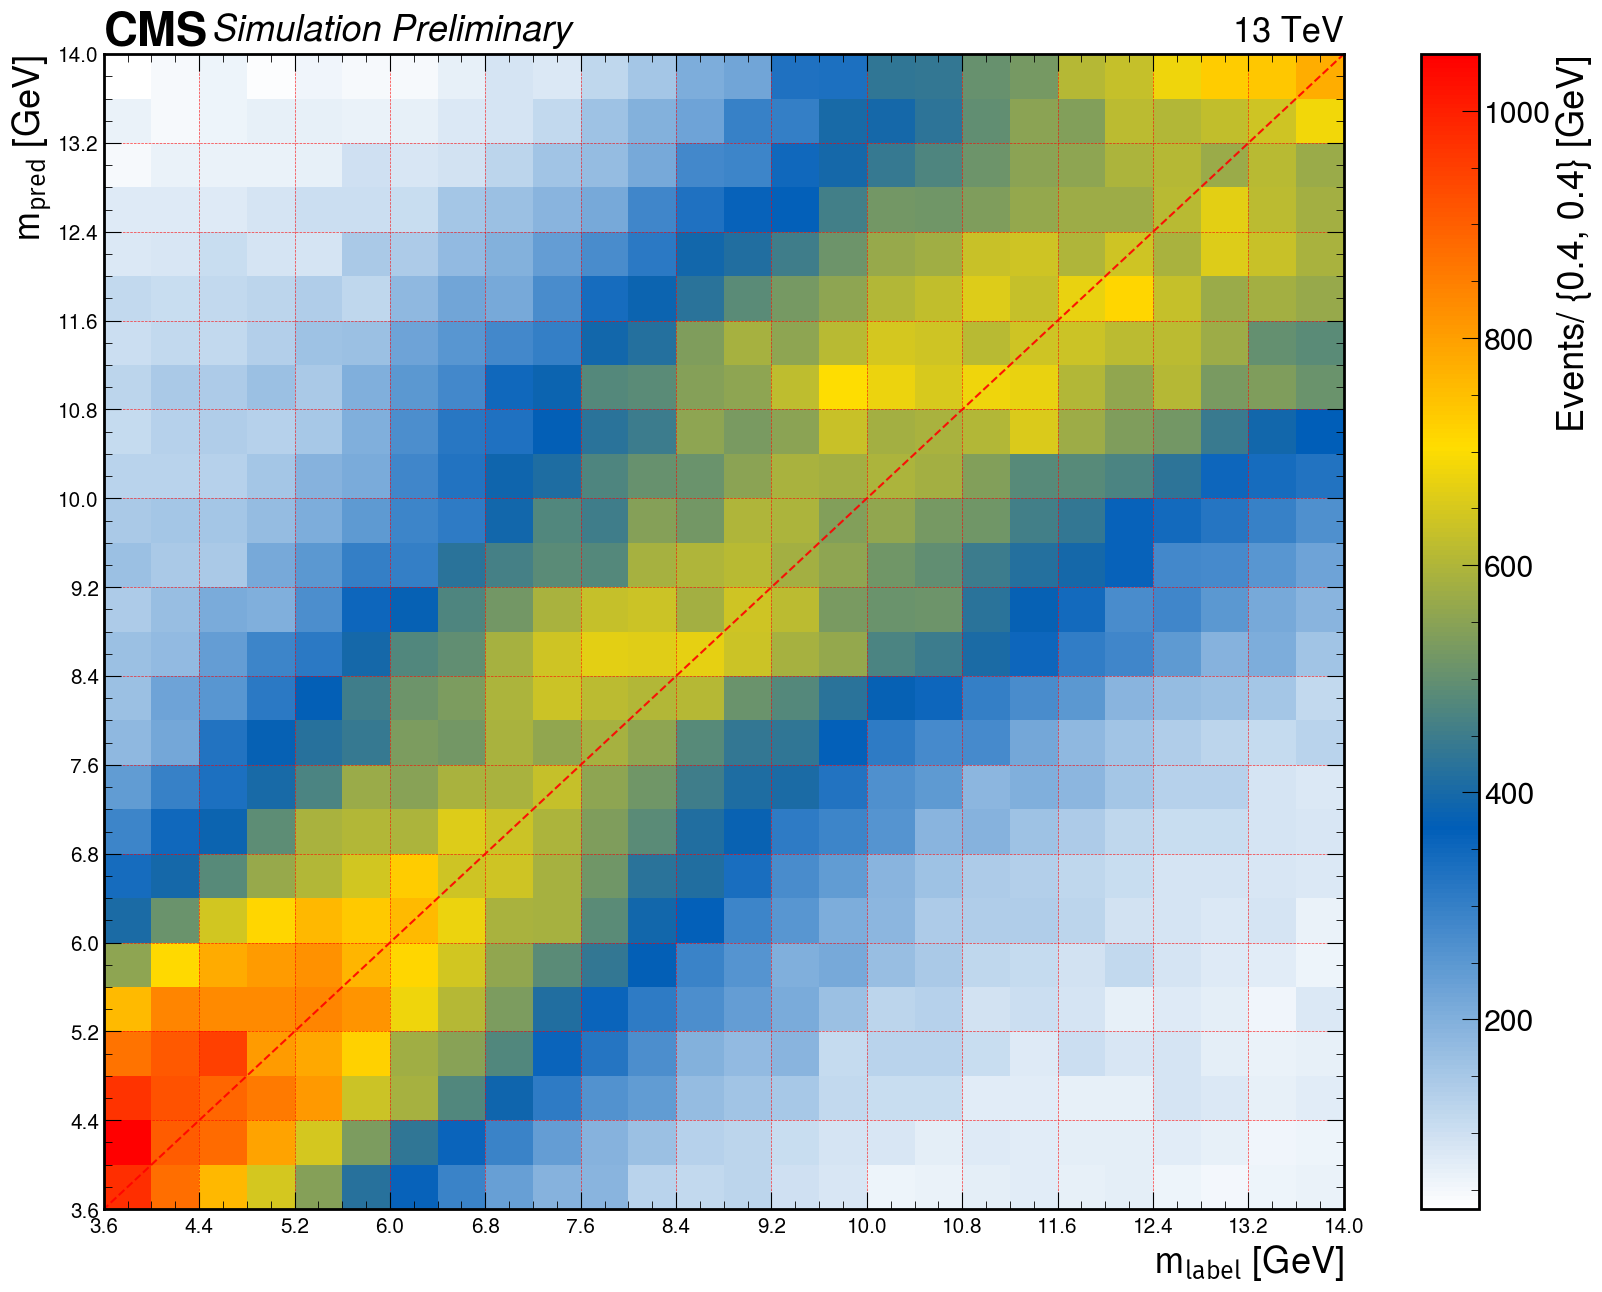

In [13]:
# 2D hist mteru and mpred
# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Truncated version
fig, ax = plt.subplots(figsize=(20,15))
hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(3.6, 14.1, .8),size=15)
plt.yticks(np.arange(3.6, 14.1, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
plt.grid(color='r', linestyle='--', linewidth=.5)

hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

# --4ch with 2 res block---

In [6]:
local='/home/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch_reblock2/INFERENCE_DATA/'
rhFileList = '%s/*/*.pkl'%(local)
paths = glob.glob(rhFileList)
assert len(paths) > 0
print(f"{len(paths)} files found")

3 files found


In [8]:
epoch=3
data_file = paths[epoch-1]
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
mae_ = data["mae"]
mre_ = data["mre"]

loaded data file ------>  /home/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_4ch_reblock2/INFERENCE_DATA/4_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks2_mae_loss_epochs15_BatchSize1024_from0_ntrain5296128_nval596992_run0/epoch3_val_pseudoscalar_mae2.2451_inference_data.pkl


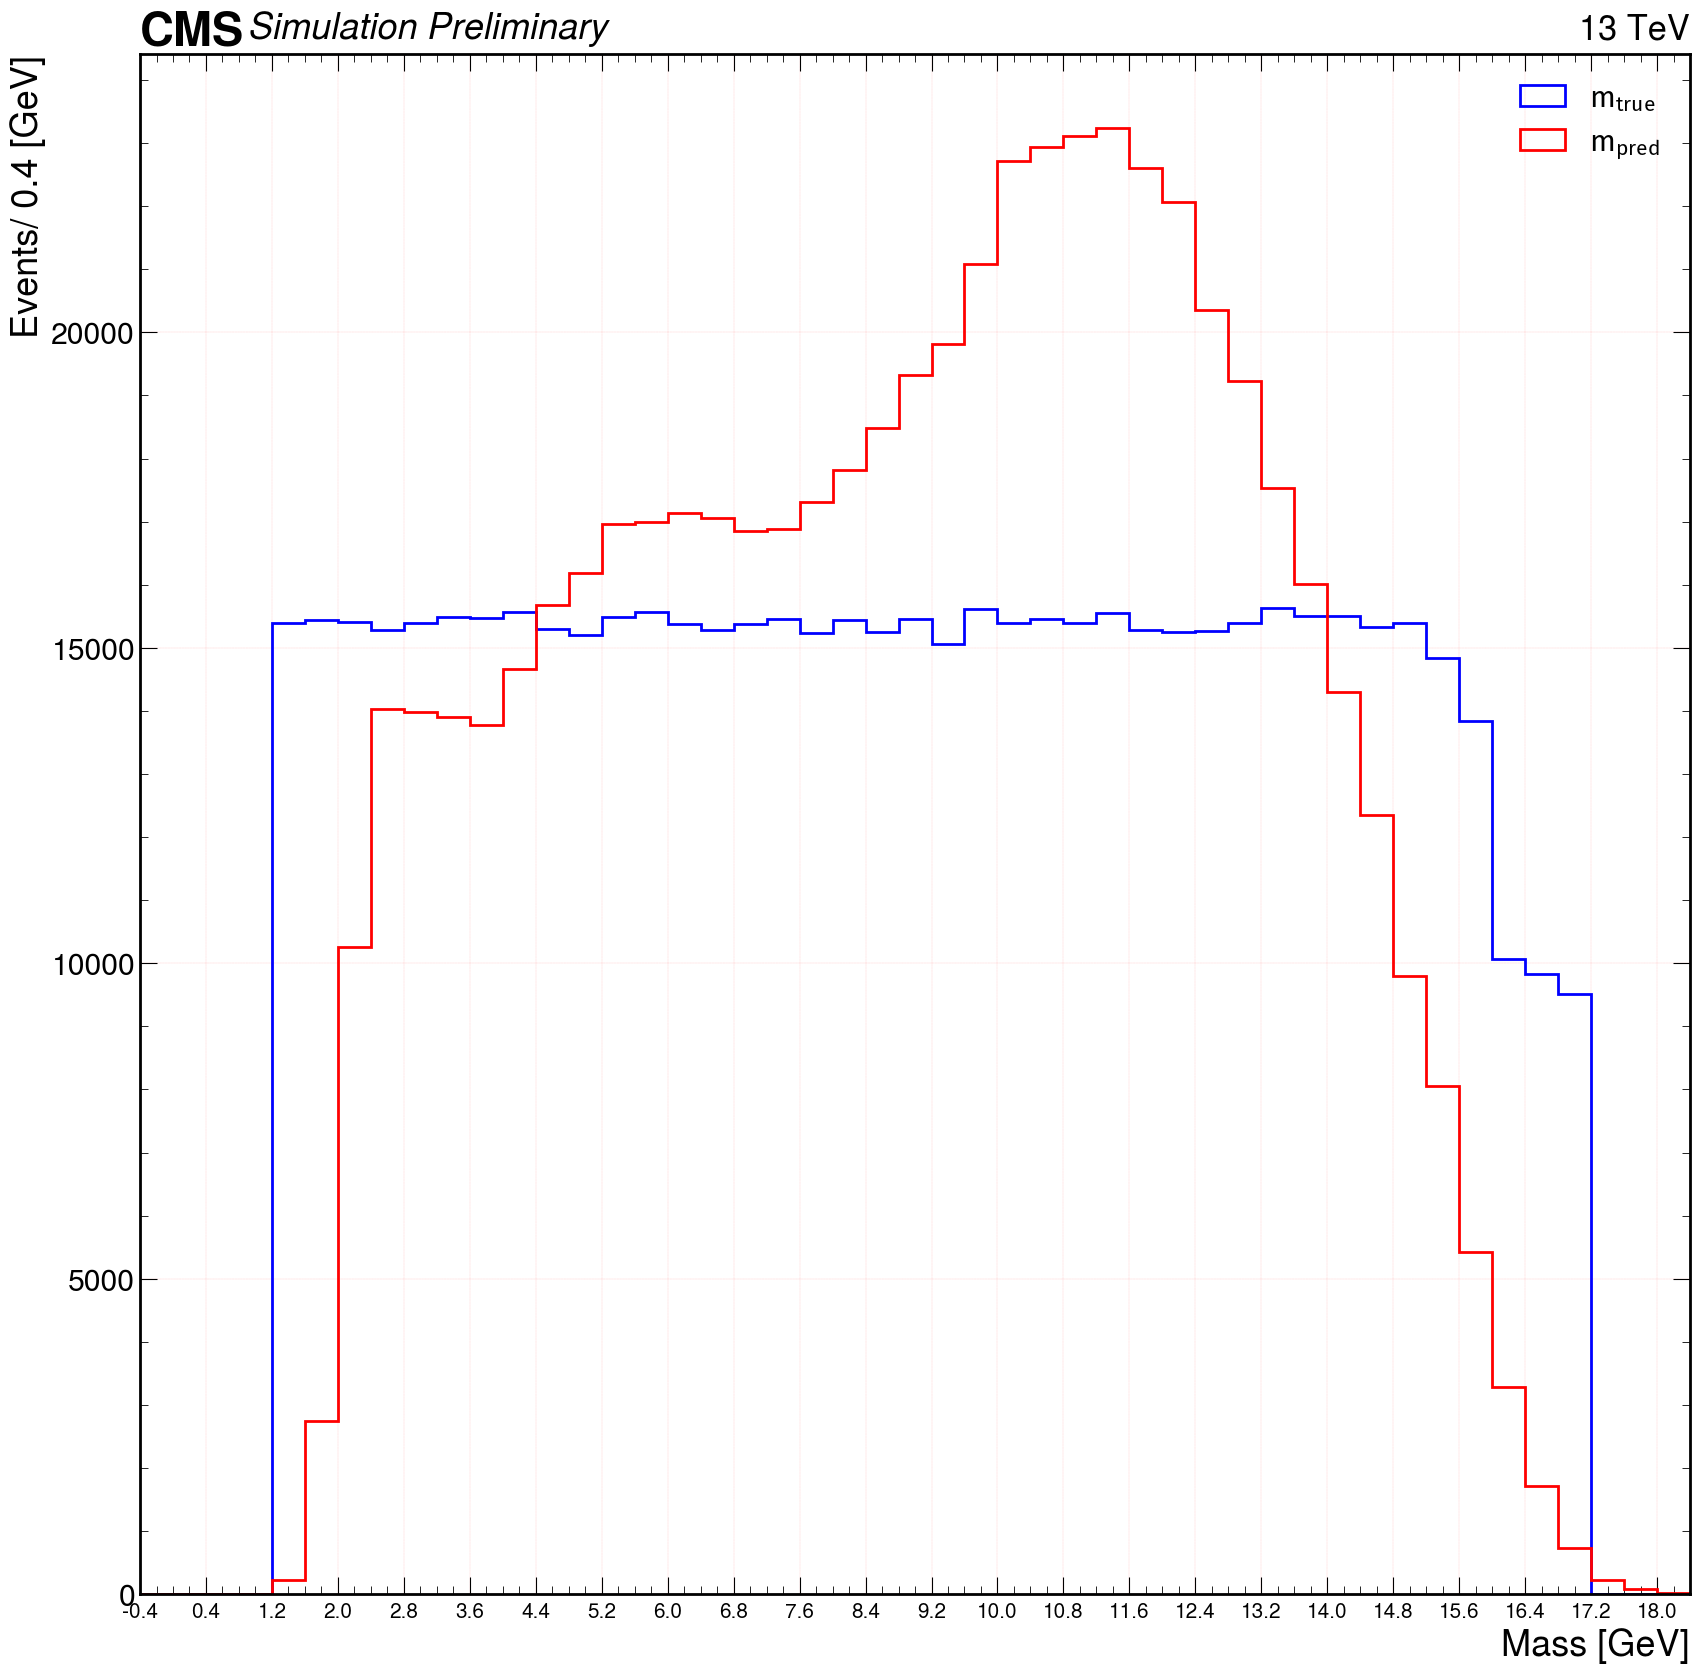

In [9]:
m0_min = 0.8
m0_max = 17.2
bin_size = 0.4
fig, ax = plt.subplots(figsize=(20,20))
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),size=15)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

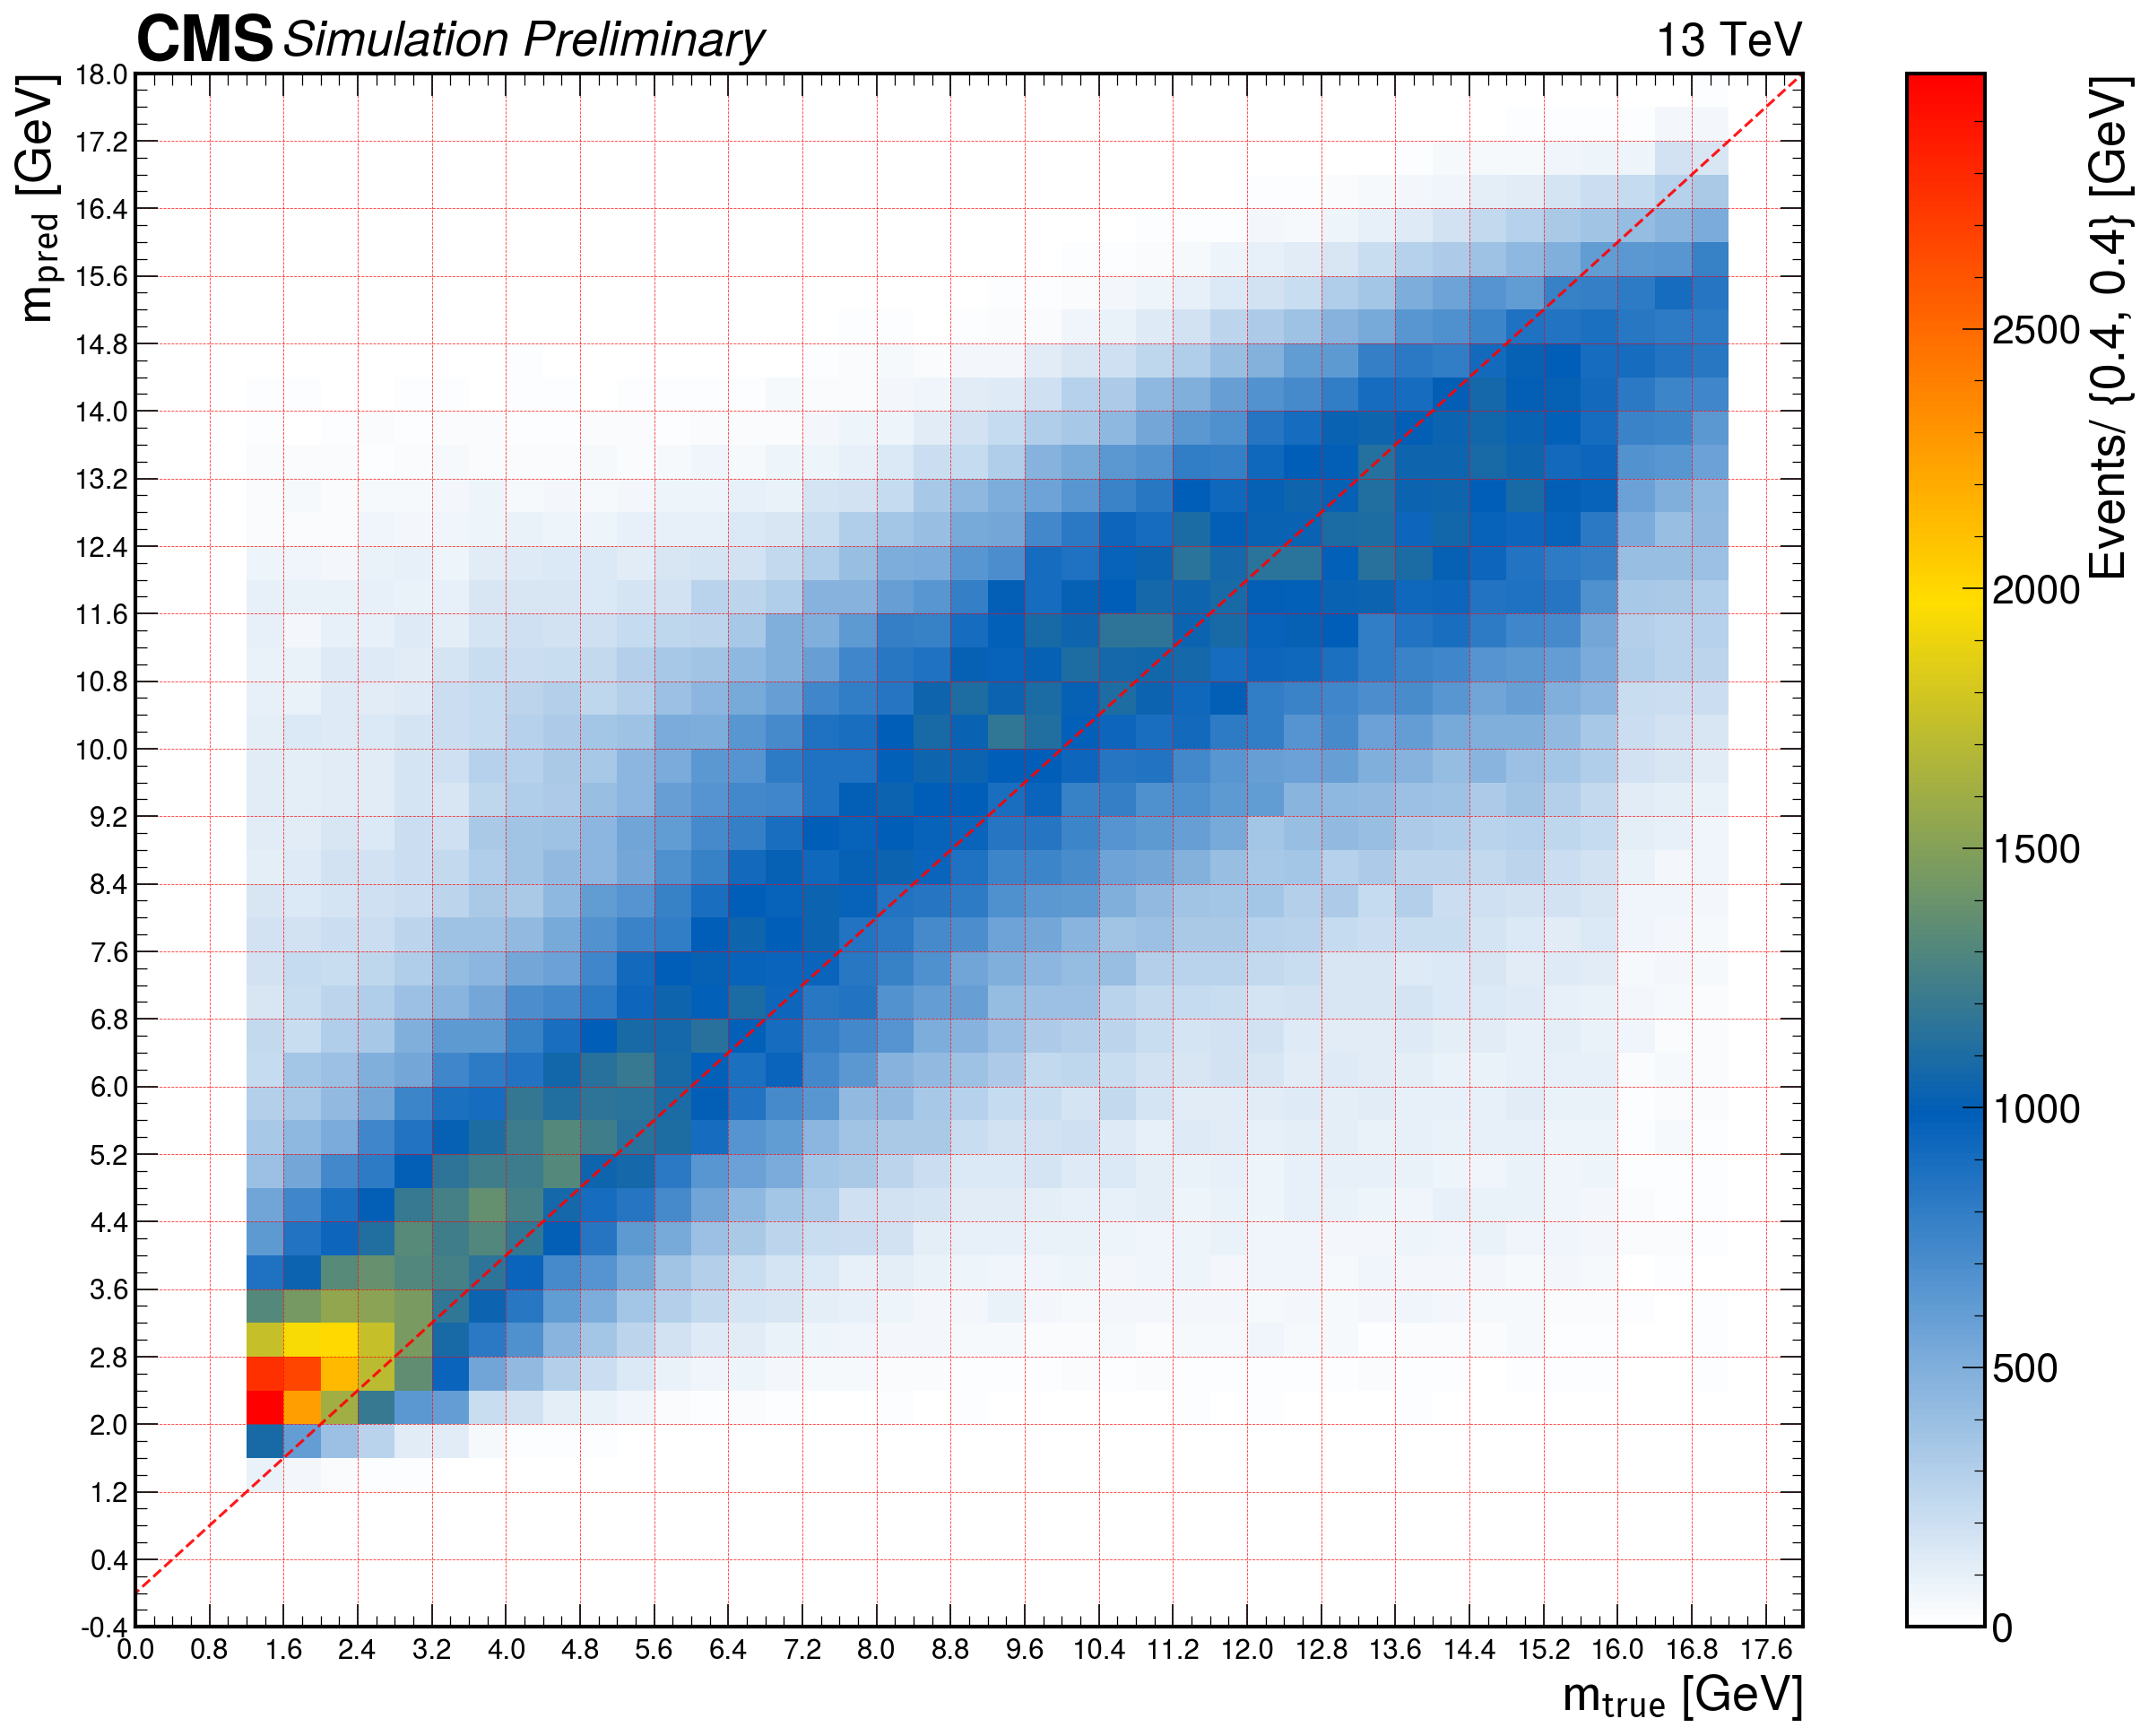

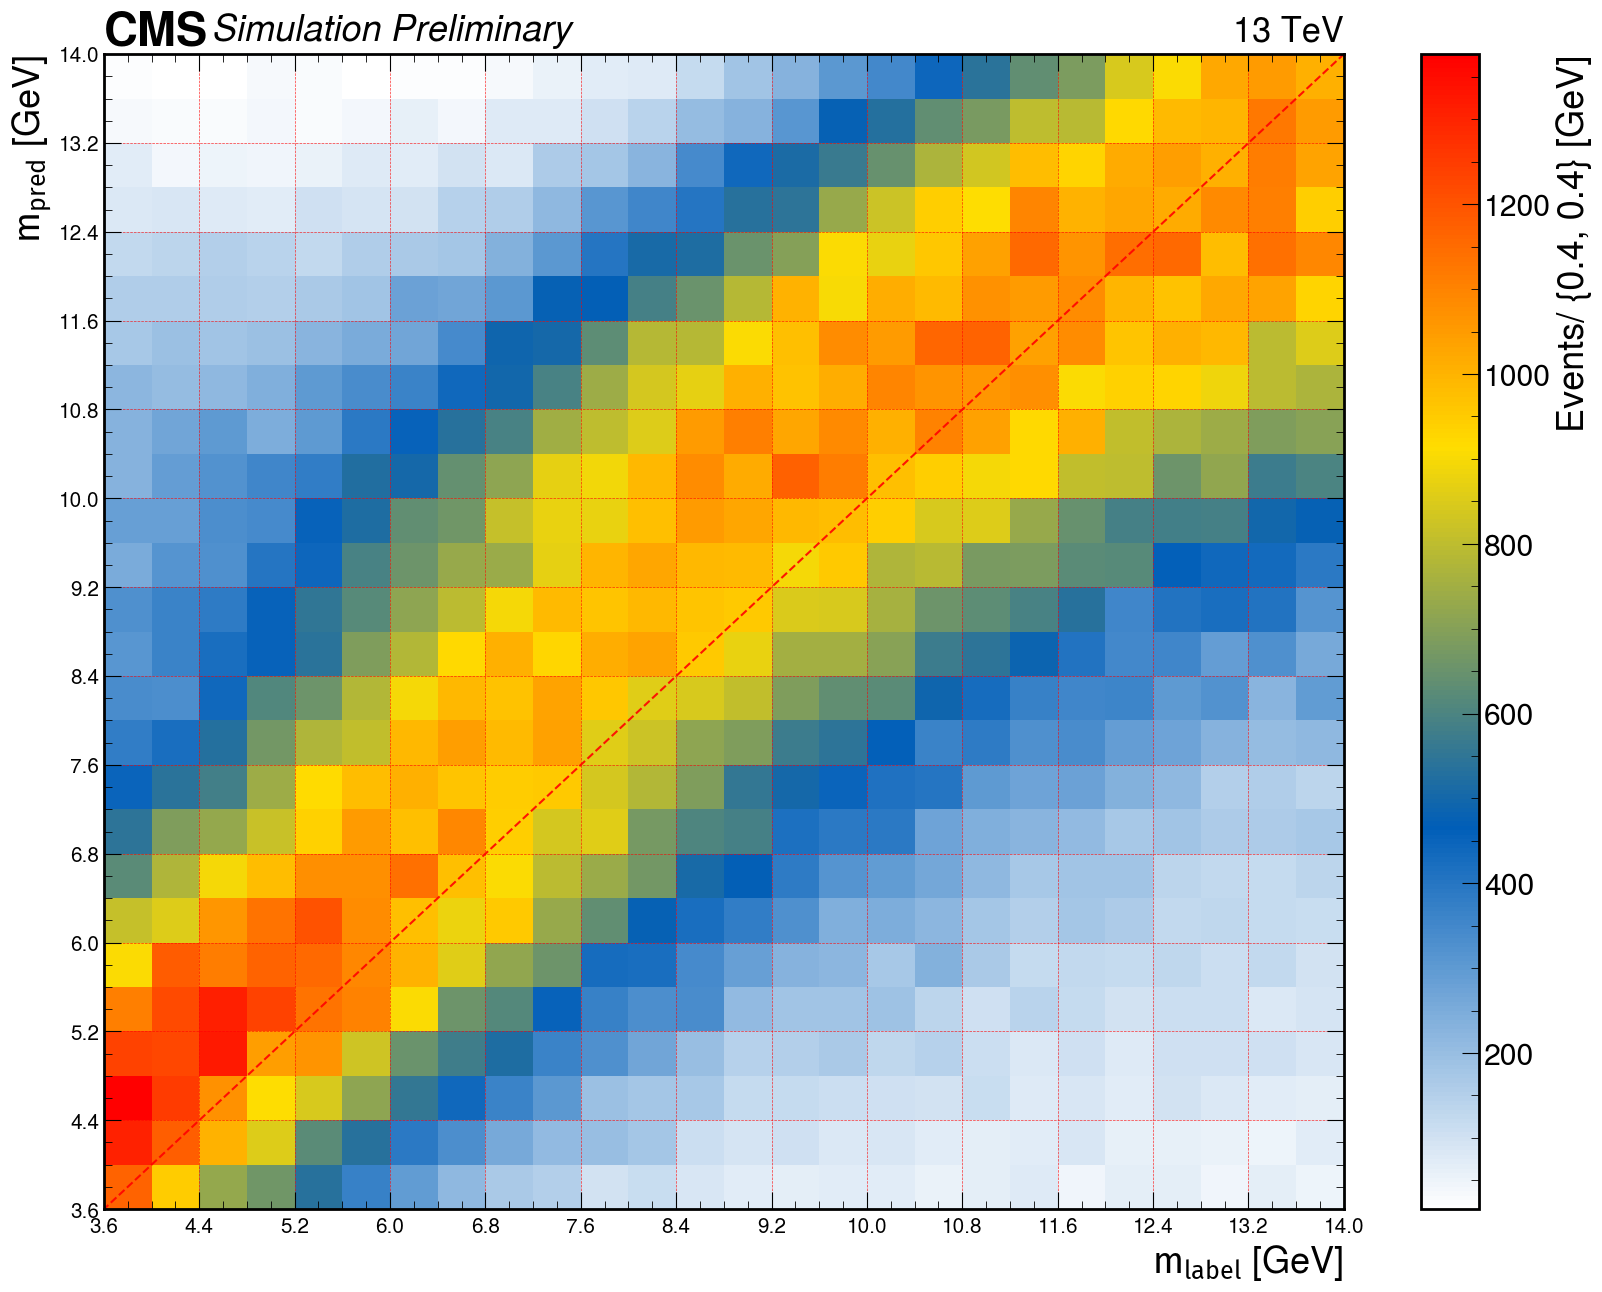

In [10]:
# 2D hist mteru and mpred
# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Truncated version
fig, ax = plt.subplots(figsize=(20,15))
hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(3.6, 14.1, .8),size=15)
plt.yticks(np.arange(3.6, 14.1, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
plt.grid(color='r', linestyle='--', linewidth=.5)

hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()